In [ ]:
# tkinter 
# pyqt5 
# modules

In [ ]:
# gui based applications

In [ ]:
# Copyright (C) 2022 The Qt Company Ltd.
# SPDX-License-Identifier: LicenseRef-Qt-Commercial OR BSD-3-Clause

"""PySide6 port of the linechart example from Qt v6.x"""

import sys

from PySide6.QtCharts import (QBarCategoryAxis, QBarSeries, QBarSet, QChart,
                              QChartView, QValueAxis)
from PySide6.QtCore import Qt
from PySide6.QtGui import QPainter
from PySide6.QtWidgets import QApplication, QMainWindow


class TestChart(QMainWindow):
    def __init__(self):
        super().__init__()

        self.set_0 = QBarSet("Jane")
        self.set_1 = QBarSet("John")
        self.set_2 = QBarSet("Axel")
        self.set_3 = QBarSet("Mary")
        self.set_4 = QBarSet("Samantha")

        self.set_0.append([1, 2, 3, 4, 5, 6])
        self.set_1.append([5, 0, 0, 4, 0, 7])
        self.set_2.append([3, 5, 8, 13, 8, 5])
        self.set_3.append([5, 6, 7, 3, 4, 5])
        self.set_4.append([9, 7, 5, 3, 1, 2])

        self.series = QBarSeries()
        self.series.append(self.set_0)
        self.series.append(self.set_1)
        self.series.append(self.set_2)
        self.series.append(self.set_3)
        self.series.append(self.set_4)

        self.chart = QChart()
        self.chart.addSeries(self.series)
        self.chart.setTitle("Simple barchart example")
        self.chart.setAnimationOptions(QChart.SeriesAnimations)

        self.categories = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]
        self.axis_x = QBarCategoryAxis()
        self.axis_x.append(self.categories)
        self.chart.addAxis(self.axis_x, Qt.AlignBottom)
        self.series.attachAxis(self.axis_x)

        self.axis_y = QValueAxis()
        self.axis_y.setRange(0, 15)
        self.chart.addAxis(self.axis_y, Qt.AlignLeft)
        self.series.attachAxis(self.axis_y)

        self.chart.legend().setVisible(True)
        self.chart.legend().setAlignment(Qt.AlignBottom)

        self._chart_view = QChartView(self.chart)
        self._chart_view.setRenderHint(QPainter.Antialiasing)

        self.setCentralWidget(self._chart_view)


if __name__ == "__main__":
    app = QApplication(sys.argv)

    window = TestChart()
    window.show()
    window.resize(420, 300)
    sys.exit(app.exec())

In [ ]:
from tkinter import *
import numpy as np

size_of_board = 600
symbol_size = (size_of_board / 3 - size_of_board / 8) / 2
symbol_thickness = 50
symbol_X_color = '#EE4035'
symbol_O_color = '#0492CF'
Green_color = '#7BC043'


class Tic_Tac_Toe():
    # ------------------------------------------------------------------
    # Initialization Functions:
    # ------------------------------------------------------------------
    def __init__(self):
        self.window = Tk()
        self.window.title('Tic-Tac-Toe')
        self.canvas = Canvas(self.window, width=size_of_board, height=size_of_board)
        self.canvas.pack()
        # Input from user in form of clicks
        self.window.bind('<Button-1>', self.click)

        self.initialize_board()
        self.player_X_turns = True
        self.board_status = np.zeros(shape=(3, 3))

        self.player_X_starts = True
        self.reset_board = False
        self.gameover = False
        self.tie = False
        self.X_wins = False
        self.O_wins = False

        self.X_score = 0
        self.O_score = 0
        self.tie_score = 0

    def mainloop(self):
        self.window.mainloop()

    def initialize_board(self):
        for i in range(2):
            self.canvas.create_line((i + 1) * size_of_board / 3, 0, (i + 1) * size_of_board / 3, size_of_board)

        for i in range(2):
            self.canvas.create_line(0, (i + 1) * size_of_board / 3, size_of_board, (i + 1) * size_of_board / 3)

    def play_again(self):
        self.initialize_board()
        self.player_X_starts = not self.player_X_starts
        self.player_X_turns = self.player_X_starts
        self.board_status = np.zeros(shape=(3, 3))

    # ------------------------------------------------------------------
    # Drawing Functions:
    # The modules required to draw required game based object on canvas
    # ------------------------------------------------------------------

    def draw_O(self, logical_position):
        logical_position = np.array(logical_position)
        # logical_position = grid value on the board
        # grid_position = actual pixel values of the center of the grid
        grid_position = self.convert_logical_to_grid_position(logical_position)
        self.canvas.create_oval(grid_position[0] - symbol_size, grid_position[1] - symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] + symbol_size, width=symbol_thickness,
                                outline=symbol_O_color)

    def draw_X(self, logical_position):
        grid_position = self.convert_logical_to_grid_position(logical_position)
        self.canvas.create_line(grid_position[0] - symbol_size, grid_position[1] - symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] + symbol_size, width=symbol_thickness,
                                fill=symbol_X_color)
        self.canvas.create_line(grid_position[0] - symbol_size, grid_position[1] + symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] - symbol_size, width=symbol_thickness,
                                fill=symbol_X_color)

    def display_gameover(self):

        if self.X_wins:
            self.X_score += 1
            text = 'Winner: Player 1 (X)'
            color = symbol_X_color
        elif self.O_wins:
            self.O_score += 1
            text = 'Winner: Player 2 (O)'
            color = symbol_O_color
        else:
            self.tie_score += 1
            text = 'Its a tie'
            color = 'gray'

        self.canvas.delete("all")
        self.canvas.create_text(size_of_board / 2, size_of_board / 3, font="cmr 60 bold", fill=color, text=text)

        score_text = 'Scores \n'
        self.canvas.create_text(size_of_board / 2, 5 * size_of_board / 8, font="cmr 40 bold", fill=Green_color,
                                text=score_text)

        score_text = 'Player 1 (X) : ' + str(self.X_score) + '\n'
        score_text += 'Player 2 (O): ' + str(self.O_score) + '\n'
        score_text += 'Tie                    : ' + str(self.tie_score)
        self.canvas.create_text(size_of_board / 2, 3 * size_of_board / 4, font="cmr 30 bold", fill=Green_color,
                                text=score_text)
        self.reset_board = True

        score_text = 'Click to play again \n'
        self.canvas.create_text(size_of_board / 2, 15 * size_of_board / 16, font="cmr 20 bold", fill="gray",
                                text=score_text)

    # ------------------------------------------------------------------
    # Logical Functions:
    # The modules required to carry out game logic
    # ------------------------------------------------------------------

    def convert_logical_to_grid_position(self, logical_position):
        logical_position = np.array(logical_position, dtype=int)
        return (size_of_board / 3) * logical_position + size_of_board / 6

    def convert_grid_to_logical_position(self, grid_position):
        grid_position = np.array(grid_position)
        return np.array(grid_position // (size_of_board / 3), dtype=int)

    def is_grid_occupied(self, logical_position):
        if self.board_status[logical_position[0]][logical_position[1]] == 0:
            return False
        else:
            return True

    def is_winner(self, player):

        player = -1 if player == 'X' else 1

        # Three in a row
        for i in range(3):
            if self.board_status[i][0] == self.board_status[i][1] == self.board_status[i][2] == player:
                return True
            if self.board_status[0][i] == self.board_status[1][i] == self.board_status[2][i] == player:
                return True

        # Diagonals
        if self.board_status[0][0] == self.board_status[1][1] == self.board_status[2][2] == player:
            return True

        if self.board_status[0][2] == self.board_status[1][1] == self.board_status[2][0] == player:
            return True

        return False

    def is_tie(self):

        r, c = np.where(self.board_status == 0)
        tie = False
        if len(r) == 0:
            tie = True

        return tie

    def is_gameover(self):
        # Either someone wins or all grid occupied
        self.X_wins = self.is_winner('X')
        if not self.X_wins:
            self.O_wins = self.is_winner('O')

        if not self.O_wins:
            self.tie = self.is_tie()

        gameover = self.X_wins or self.O_wins or self.tie

        if self.X_wins:
            print('X wins')
        if self.O_wins:
            print('O wins')
        if self.tie:
            print('Its a tie')

        return gameover





    def click(self, event):
        grid_position = [event.x, event.y]
        logical_position = self.convert_grid_to_logical_position(grid_position)

        if not self.reset_board:
            if self.player_X_turns:
                if not self.is_grid_occupied(logical_position):
                    self.draw_X(logical_position)
                    self.board_status[logical_position[0]][logical_position[1]] = -1
                    self.player_X_turns = not self.player_X_turns
            else:
                if not self.is_grid_occupied(logical_position):
                    self.draw_O(logical_position)
                    self.board_status[logical_position[0]][logical_position[1]] = 1
                    self.player_X_turns = not self.player_X_turns

            # Check if game is concluded
            if self.is_gameover():
                self.display_gameover()
                # print('Done')
        else:  # Play Again
            self.canvas.delete("all")
            self.play_again()
            self.reset_board = False


game_instance = Tic_Tac_Toe()
game_instance.mainloop()

# HMS

In [ ]:
from tkinter import *
from tkinter import ttk
root = Tk()
frm = ttk.Frame(root, padding=10)
root.title('ABC')
root.geometry('150x800+100+500')
frm.grid()
ttk.Label(frm, text="Hello World!").grid(column=0, row=0)
ttk.Button(frm, text="Quit", command=root.destroy).grid(column=1, row=0)
root.mainloop()


In [87]:
import pandas as pd
from tkinter import *
from tkinter import ttk
import time
import datetime
import random
from tkinter import messagebox
import pymysql as py
# import pyodbc as odbc
import sqlite3
from datetime import datetime
import os



class Hospital:
    def __init__(self,root):
        self.root = root
        self.root.title('HMS APP')
        self.root.geometry('1540x800+0+0')
        
        self.Nameoftablets = StringVar()
        self.ref = StringVar()
        self.Dose = StringVar()
        self.Numberoftablets = StringVar()
        self.Lot = StringVar()
        self.Issuedate = StringVar()
        self.ExpDate = StringVar()
        self.DailyDose = StringVar()
        self.sideEfect = StringVar()
        self.FurtherInformation = StringVar()
        self.StorageAdvice = StringVar()
        self.BloodPressure = StringVar()
        self.HowToUseMedication = StringVar()
        self.PatientId = StringVar()
        self.nhsNumber = StringVar()
        self.PatientName = StringVar()
        self.DateOfBirth = StringVar()
        self.PatientAddress = StringVar()
        
        
#         ===========FRAME PART======================================================
        
        lbltitle = Label(self.root,relief = RIDGE,text = "Hospital Management System",fg='blue',bd=20,bg='yellow',font = ('times new roman',50,'bold'))
        lbltitle.pack(side=TOP,fill=X)
        
        label = Label(self.root,text=datetime.now().date(),fg='blue',bg='yellow',font = ('times new roman',12,'bold'))
        label.place(x=100,y=60,anchor="center")
        
        
        Dataframe = Frame(self.root,bd=20,relief=RIDGE)
        Dataframe.place(x=0,y=130,width=1530,height=400)  
        
        DataframeLeft = LabelFrame(Dataframe,bd=10,relief=RIDGE,font = ('times new roman',15),text="Patient Information")
        DataframeLeft.place(x=0,y=5,width=980,height=350)
        
        
        DataframeRight = LabelFrame(Dataframe,bd=10,relief=RIDGE,font = ('times new roman',15),text="Prescription")
        DataframeRight.place(x=990,y=5,width=485,height=350)
        
        
        Buttonframe = Frame(self.root,bd=20,relief=RIDGE)
        Buttonframe.place(x=0,y=530,width=1530,height=70)
        
        
        Detailsframe = Frame(self.root,bd=20,relief=RIDGE)
        Detailsframe.place(x=0,y=600,width=1530,height=190)
        
        
#         ================================================================================================================

        lblNameTablet = Label(DataframeLeft,text='Names of Tablet: ',font=('times new roman',15,'bold'),padx = 2,pady = 6)
        lblNameTablet.grid(row=0,column=0)
        
        comNameTablet = ttk.Combobox(DataframeLeft,textvariable=self.Nameoftablets,state = 'readonly')
        tablets = ('alendronate tablet','alfuzosin hcl','altretamine','anastrazole','atenolol tablet')
        comNameTablet['value'] = tuple([i.title() for i in tablets])
        comNameTablet.current(1)
        comNameTablet.grid(row=0,column=1)
        
        
        lblref = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Refrence No: ",padx=6,pady = 6)
        lblref.grid(row=1,column=0,sticky=W)
        txtref = Entry(DataframeLeft,textvariable=self.ref,font=('times new roman',13),width=35)
        txtref.grid(row=1,column=1)
        
        
        lblDose = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Dose:",padx=6,pady = 6)
        lblDose.grid(row=2,column=0,sticky=W)
        txtDose = Entry(DataframeLeft,textvariable=self.Dose,font=('times new roman',13),width=35)
        txtDose.grid(row=2,column=1)
        
        
        lblNoOfTablets = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "No Of Tablets:",padx=6,pady = 6)
        lblNoOfTablets.grid(row=3,column=0,sticky=W)
        txtNoOfTablets = Entry(DataframeLeft,textvariable=self.Numberoftablets,font=('times new roman',13),width=35)
        txtNoOfTablets.grid(row=3,column=1)
        
        lblLot = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Lot:",padx=6,pady = 6)
        lblLot.grid(row=4,column=0,sticky=W)
        txtLot = Entry(DataframeLeft, textvariable=self.Lot,font=('times new roman',13,'bold'),width=35)
        txtLot.grid(row=4,column=1)
        
        lblIssueDate = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Issue Date:",padx=6,pady = 6)
        lblIssueDate.grid(row=5,column=0,sticky=W)
        txtIssueDate = Entry(DataframeLeft,textvariable=self.Issuedate,font=('times new roman',13,'bold'),width=35)
        txtIssueDate.grid(row=5,column=1)
        
        
        lblExpDate = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Exp Date:",padx=6,pady = 6)
        lblExpDate.grid(row=6,column=0,sticky=W)
        txtExpDate = Entry(DataframeLeft,textvariable=self.ExpDate,font=('times new roman',13,'bold'),width=35)
        txtExpDate.grid(row=6,column=1)
        
        
        lblDailyDose = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Daily Dose:",padx=6,pady = 6)
        lblDailyDose.grid(row=7,column=0,sticky=W)
        txtDailyDose = Entry(DataframeLeft,textvariable=self.DailyDose,font=('times new roman',13,'bold'),width=35)
        txtDailyDose.grid(row=7,column=1)
        
        lblSideEffect = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Side Effect:",padx=6)
        lblSideEffect.grid(row=8,column=0,sticky=W)
        txtSideEffect = Entry(DataframeLeft,textvariable=self.sideEfect,font=('times new roman',13,'bold'),width=35)
        txtSideEffect.grid(row=8,column=1)
        
#         -----------------RightPart----------------------
        
        lblFurtherinfo = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Further Info:",padx=6,pady = 6)
        lblFurtherinfo.grid(row=0,column=2,sticky=W)
        txtFurtherinfo = Entry(DataframeLeft,textvariable=self.FurtherInformation,font=('times new roman',13,'bold'),width=35)
        txtFurtherinfo.grid(row=0,column=3)
        
        
        lblBloodPressure = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Blood Pressure:",padx=6,pady = 6)
        lblBloodPressure.grid(row=1,column=2,sticky=W)
        txtBloodPressure = Entry(DataframeLeft,textvariable=self.BloodPressure,font=('times new roman',13,'bold'),width=35)
        txtBloodPressure.grid(row=1,column=3)
        
        
        
        lblStorage = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Storage Advice:",padx=6,pady = 6)
        lblStorage.grid(row=2,column=2,sticky=W)
        txtStorage = Entry(DataframeLeft,textvariable=self.StorageAdvice,font=('times new roman',13,'bold'),width=35)
        txtStorage.grid(row=2,column=3)
        
        
        lblMedicine = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Medication:",padx=6,pady = 6)
        lblMedicine.grid(row=3,column=2,sticky=W)
        txtMedicine = Entry(DataframeLeft,textvariable=self.HowToUseMedication,font=('times new roman',13,'bold'),width=35)
        txtMedicine.grid(row=3,column=3)
        
        
        
        #         ---------------------------------------------------------
        lblPatientId = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Patient Id:",padx=6,pady = 6)
        lblPatientId.grid(row=4,column=2,sticky=W)
        txtPatientId = Entry(DataframeLeft,textvariable=self.PatientId,font=('times new roman',13,'bold'),width=35)
        txtPatientId.grid(row=4,column=3)
        
        
        lblNhsNumber = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "NHS Number:",padx=6,pady = 6)
        lblNhsNumber.grid(row=5,column=2,sticky=W)
        txtNhsNumber = Entry(DataframeLeft,textvariable=self.nhsNumber,font=('times new roman',13,'bold'),width=35)
        txtNhsNumber.grid(row=5,column=3)
        
        
#         ---------------------------------------------------------
        lblPatientName = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Patient Name:",padx=6,pady = 6)
        lblPatientName.grid(row=6,column=2,sticky=W)
        txtPatientName = Entry(DataframeLeft,textvariable=self.PatientName,font=('times new roman',13,'bold'),width=35)
        txtPatientName.grid(row=6,column=3)
        
        
        lblDateOfBirth = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Date of Birth:",padx=6,pady = 6)
        lblDateOfBirth.grid(row=7,column=2,sticky=W)
        txtDateOfBirth = Entry(DataframeLeft,textvariable=self.DateOfBirth,font=('times new roman',13,'bold'),width=35)
        txtDateOfBirth.grid(row=7,column=3)
        
        
        
#         ---------------------------------------------------------
        lblPatientAddress = Label(DataframeLeft,font=('times new roman',12,'bold'),text = "Patient Address:",padx=6)
        lblPatientAddress.grid(row=8,column=2,sticky=W)
        txtPatientAddress = Entry(DataframeLeft,textvariable=self.PatientAddress,font=('times new roman',13,'bold'),width=35)
        txtPatientAddress.grid(row=8,column=3)
        
        
#         ===========================RightDataFrame==========================

        self.txtPrescription = Text(DataframeRight,font=('times new roman',12,'bold'),width=55,height=16,padx=10,pady=6)
        self.txtPrescription.grid(row=0,column=0)
        
        
        
#         =================Button DataFrame==================

        btnPrescription = Button(Buttonframe,command = self.insert_presc,text = 'Show Prescription',fg='black',bg='yellow',font=('times new roman',12,'bold'),width=20,height=1) #self.iprescriptionData
        btnPrescription.grid(row=0,column=1)
        
        
        btnPrescriptionData = Button(Buttonframe,command=self.iprescriptionData,text = 'Add Prescription',fg='black',bg='yellow',font=('times new roman',12,'bold'),width=20,height=1)
        btnPrescriptionData.grid(row=0,column=2)
        
        btnUpdate = Button(Buttonframe,command=self.update_record,text = 'Update',fg='black',bg='yellow',font=('times new roman',12,'bold'),width=20,height=1)
        btnUpdate.grid(row=0,column=3)
        
        
        #         ------------------------------------------------------------
        btnDelete = Button(Buttonframe,command=self.delete_record,text = 'Delete',fg='black',bg='yellow',font=('times new roman',12,'bold'),width=20,height=1)
        btnDelete.grid(row=0,column=4)
        
        
        #         ------------------------------------------------------------
        btnClear = Button(Buttonframe,command=self.clear_records,text = 'Clear',fg='black',bg='yellow',font=('times new roman',12,'bold'),width=20,height=1)
        btnClear.grid(row=0,column=5)
        
        
        btnDownloadAllData = Button(Buttonframe,command=self.download_data,text = 'Download All Records',fg='black',bg='yellow',font=('times new roman',12,'bold'),width=20,height=1)
        btnDownloadAllData.grid(row=0,column=6)
        
        
        btnPrintPrescription = Button(Buttonframe,command=self.print_presc,text = 'Print Prescription',fg='black',bg='yellow',font=('times new roman',12,'bold'),width=20,height=1)
        btnPrintPrescription.grid(row=0,column=7)
        
        
        btnExit = Button(Buttonframe,command=self.root.destroy,text = 'Exit',fg='black',bg='yellow',font=('times new roman',12,'bold'),width=17,height=1)
        btnExit.grid(row=0,column=8)
        
        scroll_x = ttk.Scrollbar(Detailsframe,orient=HORIZONTAL)
        scroll_y = ttk.Scrollbar(Detailsframe,orient=VERTICAL)
        self.hospital_table = ttk.Treeview(Detailsframe,column=('nameoftable','ref','dose','nooftablets','lot','issuedate','expdate','dailydose','storage','nhsnumber','pname','dob','address'),xscrollcommand = scroll_x.set,yscrollcommand = scroll_y.set)

        scroll_x.pack(side=BOTTOM,fill=X)
        scroll_y.pack(side=RIGHT,fill=Y)
        
        scroll_x = ttk.Scrollbar(command=self.hospital_table.xview)
        scroll_y = ttk.Scrollbar(command=self.hospital_table.yview)
        
        
        self.hospital_table.heading('nameoftable',text="Name of Tablets")
        self.hospital_table.heading('ref',text="Reference No")
        self.hospital_table.heading('dose',text="Dose")
        self.hospital_table.heading('nooftablets',text="No Of Tablets")
        self.hospital_table.heading('lot',text="Lot")    
        self.hospital_table.heading('issuedate',text="Issue Date")
        self.hospital_table.heading('expdate',text="Exp Date")
        self.hospital_table.heading('dailydose',text="Daily Dose")
        self.hospital_table.heading('storage',text="Storage")
        self.hospital_table.heading('nhsnumber',text="NHS Number")
        self.hospital_table.heading('pname',text="Patient Name")
        self.hospital_table.heading('dob',text="DOB")
        self.hospital_table.heading('address',text="Address")
        
        self.hospital_table['show'] = 'headings'
        self.hospital_table.pack(fill=BOTH,expand=1)
        
        
        self.hospital_table.column('nameoftable',width=100)
        self.hospital_table.column('ref',width=100) 
        self.hospital_table.column('dose',width=100)        
        self.hospital_table.column('nooftablets',width=100)        
        self.hospital_table.column('lot',width=100)        
        self.hospital_table.column('issuedate',width=100)        
        self.hospital_table.column('expdate',width=100)        
        self.hospital_table.column('dailydose',width=100)        
        self.hospital_table.column('storage',width=100)        
        self.hospital_table.column('nhsnumber',width=100)        
        self.hospital_table.column('pname',width=100)        
        self.hospital_table.column('dob',width=100) 
        self.hospital_table.column('address',width=100)
        self.hospital_table.bind("<ButtonRelease-1>", self.tbl_cursor)
        self.show_records()
        
        
    def insert_presc(self):
        self.txtPrescription.insert(END, "Prescription".ljust(76) + str(datetime.now().time())[:8] + '\n')
        self.txtPrescription.insert(END, "Name of Tablets\t\t\t: " + self.Nameoftablets.get() + '\n')
        self.txtPrescription.insert(END, "Reference No\t\t\t: " + self.ref.get() + '\n')
        self.txtPrescription.insert(END, "Dose\t\t\t: " + self.Dose.get() + '\n')
        self.txtPrescription.insert(END, "No of Tablets\t\t\t: " + self.Numberoftablets.get() + '\n')
        self.txtPrescription.insert(END, "Lot\t\t\t: " + self.Lot.get() + '\n')
        self.txtPrescription.insert(END, "Issue date\t\t\t: " + self.Issuedate.get() + '\n')
        self.txtPrescription.insert(END, "Exp date\t\t\t: " + self.ExpDate.get() + '\n')
        self.txtPrescription.insert(END, "Daily Dose\t\t\t: " + self.DailyDose.get() + '\n')
        self.txtPrescription.insert(END, "Side Effect\t\t\t: " + self.sideEfect.get() + '\n')
        self.txtPrescription.insert(END, "Further info\t\t\t: " + self.FurtherInformation.get() + '\n')
        self.txtPrescription.insert(END, "BP\t\t\t: " + self.BloodPressure.get() + '\n')
        self.txtPrescription.insert(END, "Storage\t\t\t: " + self.StorageAdvice.get() + '\n')
        self.txtPrescription.insert(END, "Medicine\t\t\t: " + self.HowToUseMedication.get() + '\n')
        self.txtPrescription.insert(END, "Patient Id\t\t\t: " + self.PatientId.get() + '\n')
        self.txtPrescription.insert(END, "NHS No\t\t\t: " + self.nhsNumber.get() + '\n')
        self.txtPrescription.insert(END, "Patient name\t\t\t: " + self.PatientName.get() + '\n')
        self.txtPrescription.insert(END, "DOB\t\t\t: " + self.DateOfBirth.get() + '\n')
        self.txtPrescription.insert(END, "Patient Address\t\t\t: " + self.PatientAddress.get() + '\n')
        self.show_records()
        
    def iprescriptionData(self):
        try:
            if self.Nameoftablets.get() == '' or self.ref.get() == '':
                messagebox.showerror("Error", 'All fields are required')
            else:
                conn = py.Connect(user='root', host='localhost', password='1401', autocommit=True, database='hms')
                cur = conn.cursor()

                data = (
                    f'''"{self.Nameoftablets.get()}","{self.ref.get()}","{self.Dose.get()}","{self.Numberoftablets.get()}","{self.Lot.get()}","{self.Issuedate.get()}","{self.ExpDate.get()}","{self.DailyDose.get()}","{self.StorageAdvice.get()}","{self.nhsNumber.get()}","{self.PatientName.get()}","{self.DateOfBirth.get()}","{self.PatientAddress.get()}"''')

                #             print(data)

                q = f'''insert into hms.hospital values({data});'''
                cur.execute(q)
                conn.close()
                messagebox.showinfo('success', 'Record has been inserted')
        except Exception as e:
            messagebox.showerror("Error", e)
        self.show_records()
    
    def show_records(self):
        conn = py.Connect(user='root', host='localhost', password='1401', autocommit=True, database='hms')
        cur = conn.cursor()

        cur.execute('select * from hospital;')
        data = cur.fetchall()
        if len(data) != 0:
            self.hospital_table.delete(*self.hospital_table.get_children())
            for i in data:
                #                 print(i)
                self.hospital_table.insert('', END, values=i)
        conn.close()

        
    def print_presc(self):

        all_data = ["Prescription\t\t\t\t" + str(datetime.now().time())[:8] + '\n',
                    "Name of Tablets\t\t\t: " + self.Nameoftablets.get() + '\n',
                    "Reference No\t\t\t: " + self.ref.get() + '\n',
                    "Dose\t\t\t\t: " + self.Dose.get() + '\n',
                    "No of Tablets\t\t\t: " + self.Numberoftablets.get() + '\n',
                    "Lot\t\t\t\t: " + self.Lot.get() + '\n',
                    "Issue date\t\t\t: " + self.Issuedate.get() + '\n',
                    "Exp date\t\t\t: " + self.ExpDate.get() + '\n',
                    "Daily Dose\t\t\t: " + self.DailyDose.get() + '\n',
                    "Side Effect\t\t\t: " + self.sideEfect.get() + '\n',
                    "Further info\t\t\t: " + self.FurtherInformation.get() + '\n',
                    "BP\t\t\t\t: " + self.BloodPressure.get() + '\n',
                    "Storage\t\t\t\t: " + self.StorageAdvice.get() + '\n',
                    "Medicine\t\t\t: " + self.HowToUseMedication.get() + '\n',
                    "Patient Id\t\t\t: " + self.PatientId.get() + '\n',
                    "NHS No\t\t\t\t: " + self.nhsNumber.get() + '\n',
                    "Patient name\t\t\t: " + self.PatientName.get() + '\n',
                    "DOB\t\t\t\t: " + self.DateOfBirth.get() + '\n',
                    "Patient Address\t\t\t: " + self.PatientAddress.get() + '\n']
        with open('data.txt', 'w+') as f:
            f.writelines(all_data)

            os.startfile('data.txt', 'print')
        self.show_records() 
        
    def download_data(self):
        conn = py.Connect(user='root', host='localhost', password='1401', autocommit=True, database='hms')
        cur = conn.cursor()

        cur.execute('select * from hospital;')
        data = cur.fetchall()
        col = [i[0] for i in cur.description]

        df = pd.DataFrame(data, columns=col)
        df.to_csv('C:\\Users\\Lenovo\\Desktop\\patient_records.csv', index=False)
        #         print(df)
        messagebox.showinfo('success', 'Records downloaded')
        conn.close()
        
        
    def clear_records(self):

        self.Nameoftablets.set('Modi')
        self.ref.set('')
        self.Dose.set('')
        self.Numberoftablets.set('')
        self.Lot.set('')
        self.Issuedate.set('')
        self.ExpDate.set('')
        self.DailyDose.set('')
        self.sideEfect.set('')
        self.FurtherInformation.set('')
        self.StorageAdvice.set('')
        self.BloodPressure.set('')
        self.HowToUseMedication.set('')
        self.PatientId.set('')
        self.nhsNumber.set('')
        self.PatientName.set('')
        self.DateOfBirth.set('')
        self.PatientAddress.set('')
        self.txtPrescription.delete('1.0', END)
        self.show_records()
        
        
    def tbl_cursor(self, event=""):
        cursor_row = self.hospital_table.focus()
        data = self.hospital_table.item(cursor_row)

        row = data['values']
        #         print(row)
        self.Nameoftablets.set(row[0])
        self.ref.set(row[1])
        self.Dose.set(row[2])
        self.Numberoftablets.set(row[3])
        self.Lot.set(row[4])
        self.Issuedate.set(row[5])
        self.ExpDate.set(row[6])
        self.DailyDose.set(row[7])
        self.StorageAdvice.set(row[8])
        self.nhsNumber.set(row[9])
        self.PatientName.set(row[10])
        self.DateOfBirth.set(row[11])
        self.PatientAddress.set(row[12])
        
        
    def update_record(self):
        conn = py.Connect(user='root', host='localhost', password='1401', autocommit=True, database='hms')
        cur = conn.cursor()

        cur.execute(f'''update hospital set Nameoftablets = "{self.Nameoftablets.get()}",
        dose = "{self.Dose.get()}",
        numberoftablets = "{self.Numberoftablets.get()}",
        lot = "{self.Lot.get()}",
        issuedate = "{self.Issuedate.get()}",
        expdate = "{self.ExpDate.get()}",
        dailydose = "{self.DailyDose.get()}",
        storage = "{self.StorageAdvice.get()}",
        nhsnumber = "{self.nhsNumber.get()}",
        patientname = "{self.PatientName.get()}",
        dob = "{self.DateOfBirth.get()}",
        patientaddress = "{self.PatientAddress.get()}"
        where referenceno = "{self.ref.get()}";'''.replace('\n', ''))

        messagebox.showinfo('Updated', 'Patient record updated successfully!!')
        
        self.show_records()
        conn.close()
        
            
    def delete_record(self):
        conn = py.Connect(user='root', host='localhost', password='1401', autocommit=True, database='hms')
        cur = conn.cursor()

        cur.execute(f'delete from hospital where Referenceno = "{self.ref.get()}";')
        conn.close()
        
        self.show_records()
        messagebox.showinfo('Deleted', 'Patient record deleted successfully!!')
    
        
root = Tk()
ob = Hospital(root)
root.mainloop()

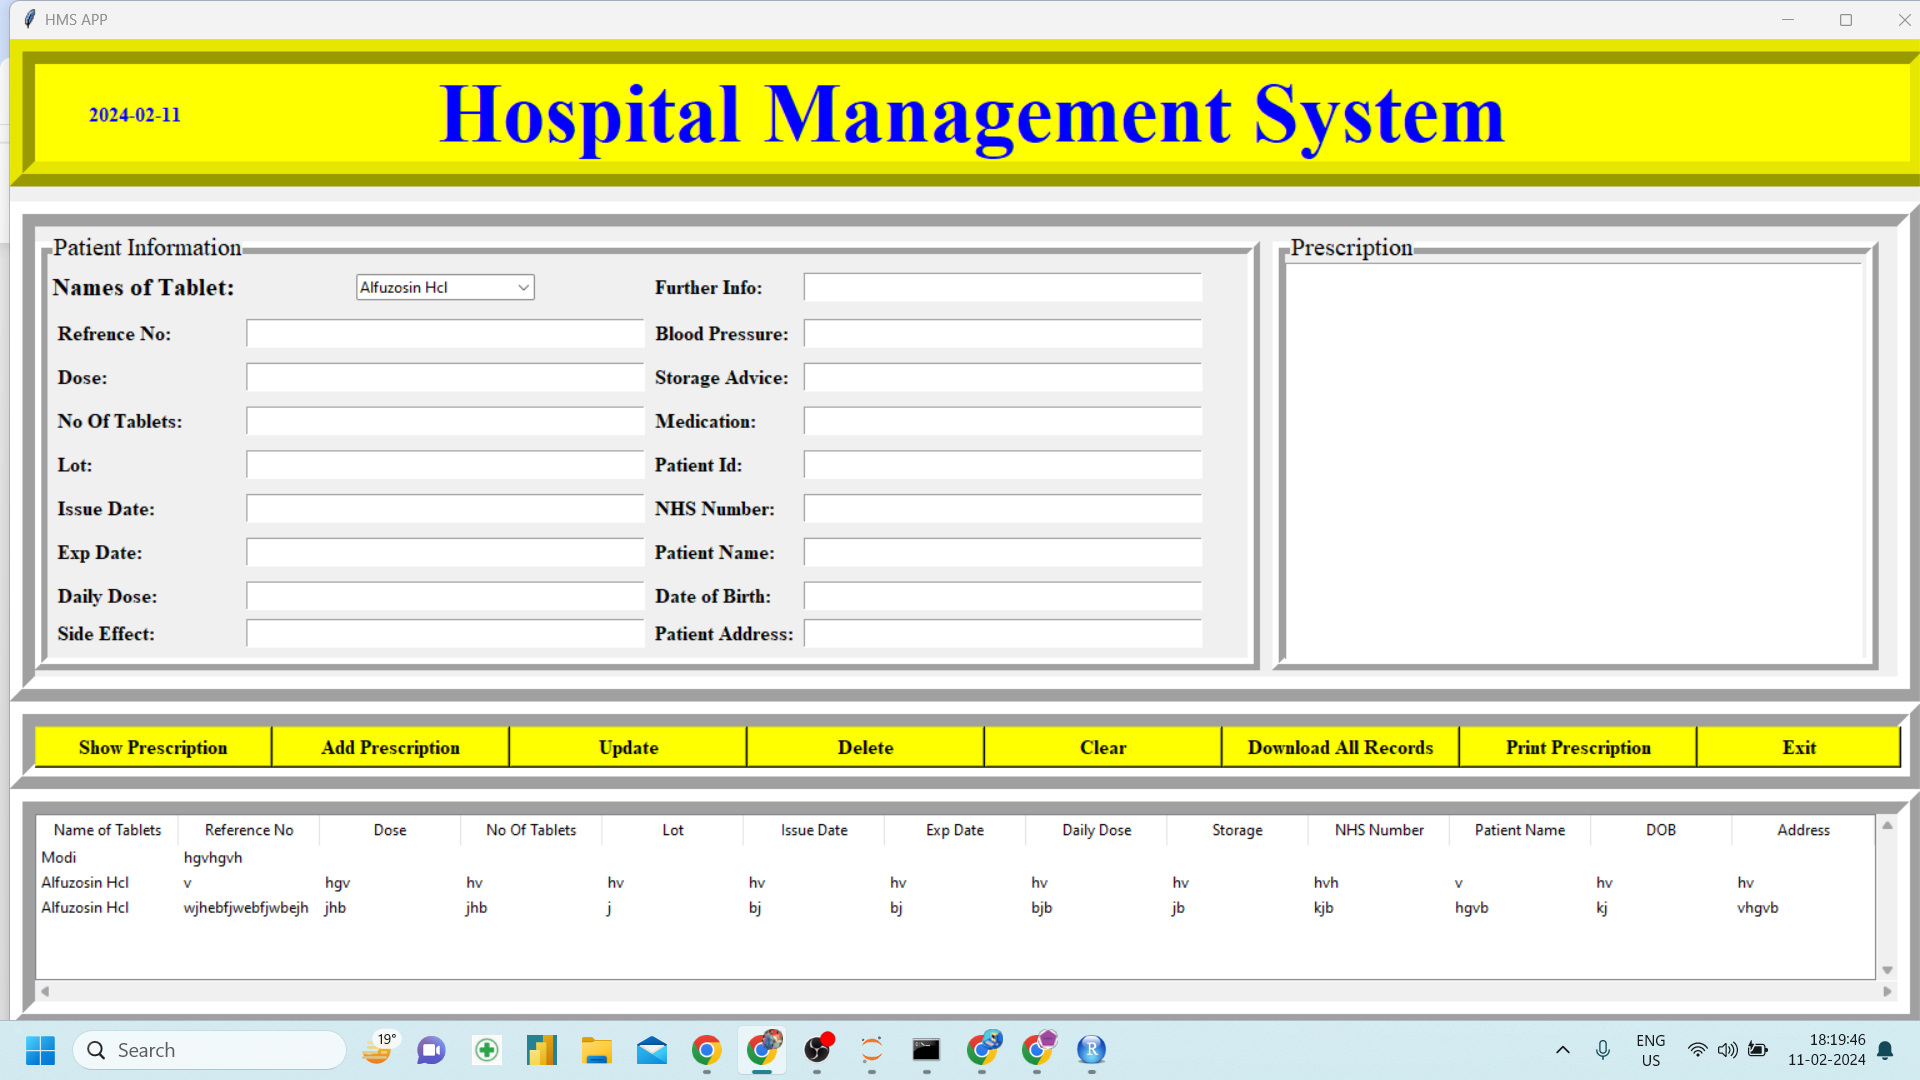